![Apple Logo](https://www.logo.wine/a/logo/Apple_Inc./Apple_Inc.-White-Dark-Background-Logo.wine.svg)

**GIỚI THIỆU**

Apple Inc (Apple) là một công ty thiết kế, sản xuất và tiếp thị điện thoại thông minh, máy tính bảng, máy tính cá nhân (PCs) và thiết bị di động. Công ty cũng cung cấp các phần mềm và dịch vụ liên quan, phụ kiện và ứng dụng nội dung kỹ thuật số của bên thứ ba. Danh mục sản phẩm của Apple bao gồm iPhone, iPad, Mac, iPod, Apple Watch và Apple TV. Họ còn cung cấp các ứng dụng phần mềm tiêu dùng và chuyên nghiệp như iOS, macOS, iPadOS và watchOS, iCloud, AppleCare, Apple Pay và. Apple bán và phân phát nội dung số và ứng dụng thông qua Apple Store, App Store, Apple Arcade, Apple News+, Apple Fitness+, Apple Card, Apple Pay và Apple Music. Công ty có mặt trong kinh doanh trên khắp châu Mỹ, châu Âu, Trung Đông, châu Phi và châu Á-Thái Bình Dương. Apple có trụ sở tại Cupertino, California, Hoa Kỳ.

Trong đoạn code sau, chúng em đã thực hiện Trực quan hóa Dữ liệu và Phân tích Giá cổ phiếu của Công ty Apple. Hiển thị khi giá cả tăng hoặc giảm, tương quan giữa các giá trị và các thông tin hữu ích khác. Trong quá trình này, chúng em sử dụng các thư viện kỹ thuật như Pandas, NumPy, Matplotlib và Seaborn.

**Import Thư Viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Dataset**

In [2]:
AAPL = pd.read_csv('./dataset/aapl_raw_data.csv')

**Thông Tin Cơ Bản về Dataset**

In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10869 entries, 0 to 10868
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10869 non-null  object 
 1   open            10869 non-null  float64
 2   high            10869 non-null  float64
 3   low             10869 non-null  float64
 4   close           10869 non-null  float64
 5   volume          10869 non-null  int64  
 6   adjusted_close  10869 non-null  float64
 7   change_percent  10868 non-null  float64
 8   avg_vol_20d     10850 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 764.4+ KB


In [4]:
# Kiểm Tra Các Cột
AAPL.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

In [5]:
# Kiểm Tra số lượng các cột và hàng
AAPL.shape

(10869, 9)

In [6]:
# Hiển thị 10 hàng đầu tiên
AAPL[0:10]

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN
5,1980-12-19,28.2464,28.3808,28.2464,28.2464,217100,0.0976,6.09,NaN
6,1980-12-22,29.6352,29.7472,29.6352,29.6352,166800,0.1024,4.92,NaN
7,1980-12-23,30.8672,31.0016,30.8672,30.8672,209600,0.1066,4.10,NaN
8,1980-12-24,32.5024,32.6144,32.5024,32.5024,214300,0.1123,5.35,NaN
9,1980-12-26,35.5040,35.6160,35.5040,35.5040,248100,0.1227,9.26,NaN


In [7]:
# hiển thị các hàng cuối
AAPL.tail()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
10864,2024-01-18,186.09,189.14,185.83,188.63,78005800,188.63,3.26,51735825.0
10865,2024-01-19,189.33,191.95,188.82,191.56,68741000,191.56,1.55,53137170.0
10866,2024-01-22,192.30,195.33,192.26,193.89,60133900,193.89,1.22,53531725.0
10867,2024-01-23,195.02,195.75,193.83,195.18,42355600,195.18,0.67,53325380.0
10868,2024-01-24,195.42,196.38,194.34,194.50,53436628,194.50,-0.35,54141071.4


In [8]:
# Kiểm tra số lượng giá trị null
AAPL.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

In [9]:
(AAPL.isnull().sum()).values

array([ 0,  0,  0,  0,  0,  0,  0,  1, 19], dtype=int64)

In [10]:
# Drop các hàng null nếu có
AAPL_u = AAPL.dropna(how="all")
AAPL_u

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN
...,...,...,...,...,...,...,...,...,...
10864,2024-01-18,186.0900,189.1400,185.8300,188.6300,78005800,188.6300,3.26,51735825.0
10865,2024-01-19,189.3300,191.9500,188.8200,191.5600,68741000,191.5600,1.55,53137170.0
10866,2024-01-22,192.3000,195.3300,192.2600,193.8900,60133900,193.8900,1.22,53531725.0
10867,2024-01-23,195.0200,195.7500,193.8300,195.1800,42355600,195.1800,0.67,53325380.0


**TRỰC QUAN HÓA**

In [11]:
# Lấy tập dữ liệu từ năm 2011 đến năm 2023
AAPL_11_23 = AAPL_u[(AAPL_u['date'] >= '2011-01-01') & (AAPL_u['date'] <= '2023-12-31')]

************************************************
 15240700    2
97918500    2
36529700    2
36660000    2
44998500    2
           ..
43940900    1
55550400    1
42035800    1
48160000    1
42628800    1
Name: volume, Length: 3259, dtype: int64 
************************************************


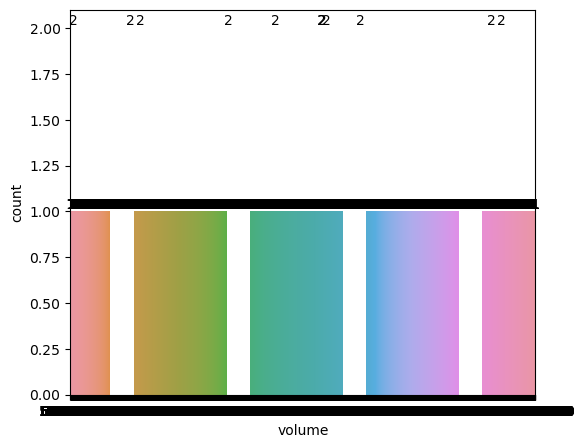

In [12]:
print('************************************************\n',AAPL_11_23['volume'].value_counts(), '\n************************************************')
plt.figure(figsize=(6,5))

ax = sns.countplot(data=AAPL_11_23, x='volume')
ax.bar_label(ax.containers[0])
plt.show()

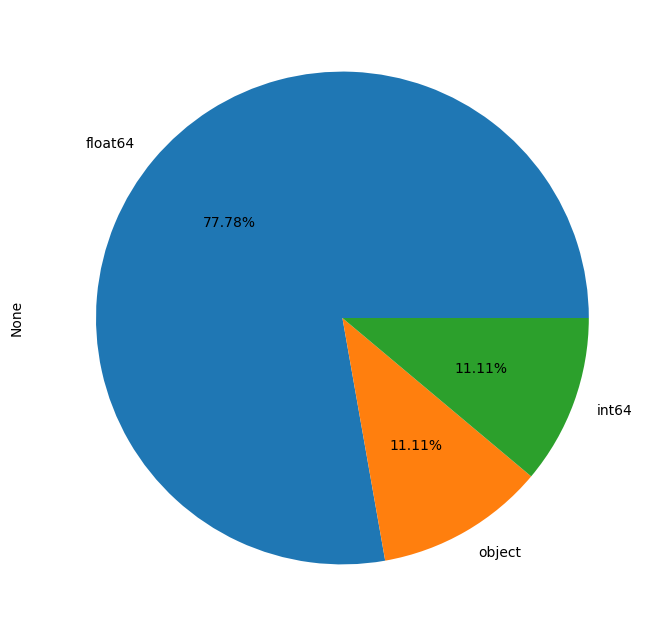

In [13]:
plt.figure(figsize=(8,8))
AAPL_11_23.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

3270

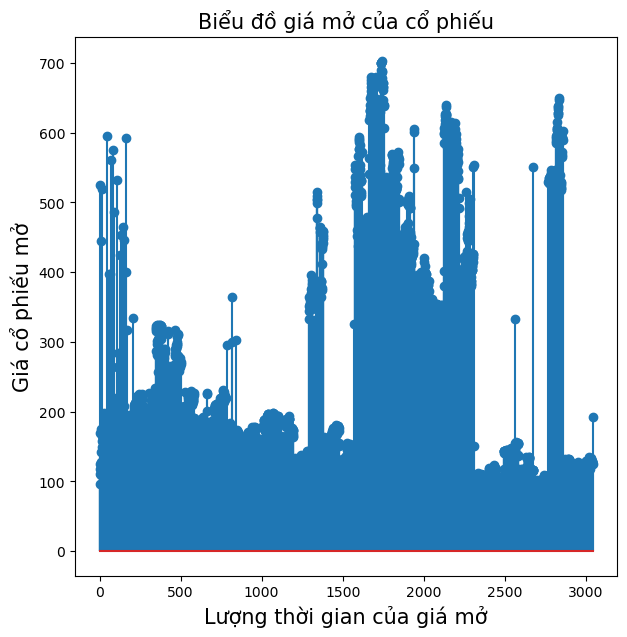

In [14]:
# Hiển thị giá trị tăng và giảm thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(AAPL_11_23['open'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá mở", fontsize=15)
plt.ylabel("Giá cổ phiếu mở", fontsize=15)
plt.title("Biểu đồ giá mở của cổ phiếu", fontsize=15)
plt.show
(AAPL_11_23['open'].value_counts()).sum()

3270

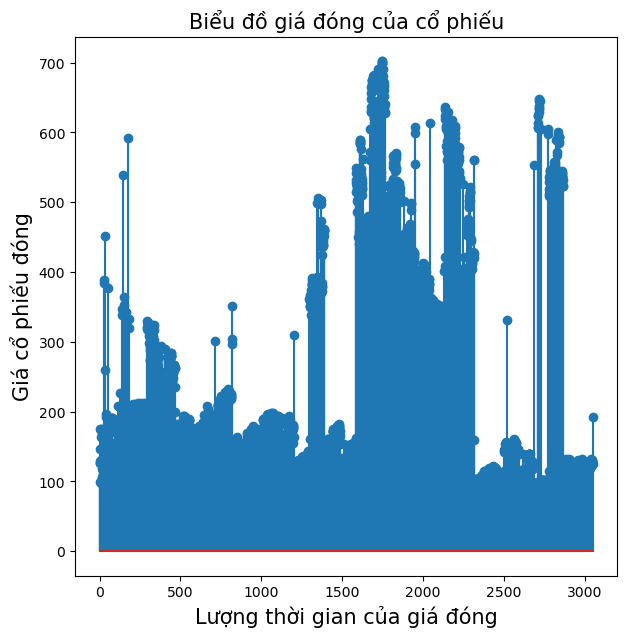

In [15]:
# Thể hiện sự tăng giảm của giá trị thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(AAPL_11_23['close'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá đóng", fontsize=15)
plt.ylabel("Giá cổ phiếu đóng", fontsize=15)
plt.title("Biểu đồ giá đóng của cổ phiếu", fontsize=15)
plt.show
(AAPL_11_23['close'].value_counts()).sum()

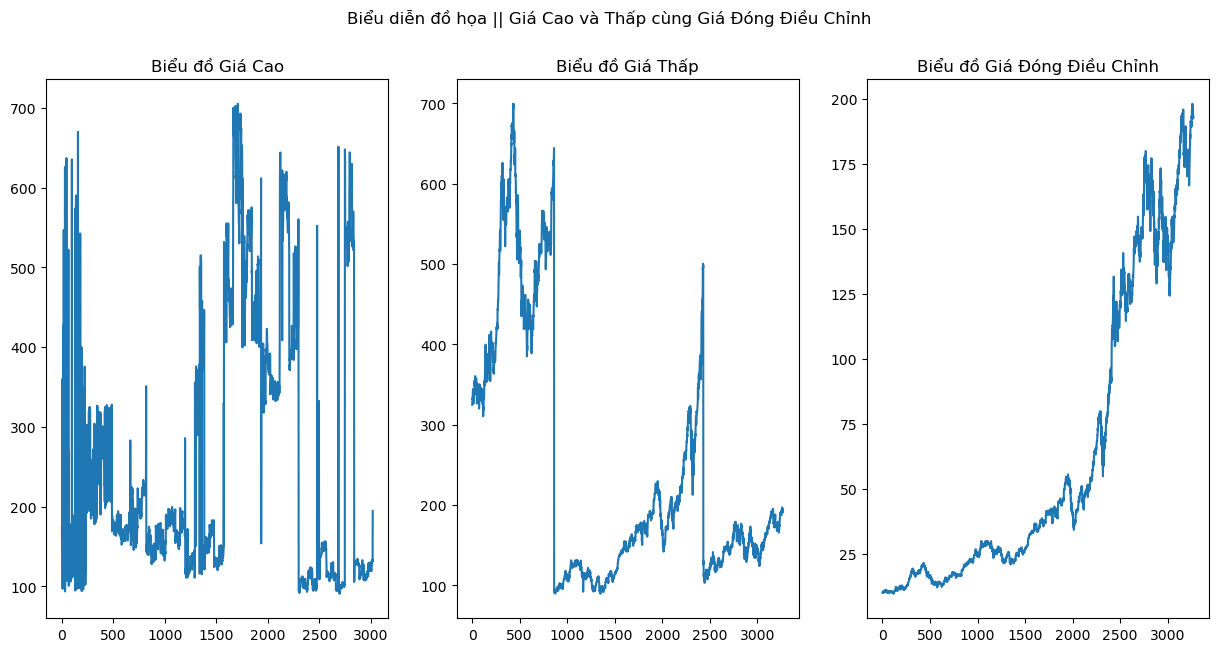

In [16]:
# Những đồ thị này thể hiện sự lên xuống của giá trị
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(list(AAPL_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Giá Cao")
plt.subplot(132)
plt.plot(list(AAPL_11_23['low']))
plt.title("Biểu đồ Giá Thấp")
plt.subplot(133)
plt.plot(list(AAPL_11_23['adjusted_close']))
plt.title("Biểu đồ Giá Đóng Điều Chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

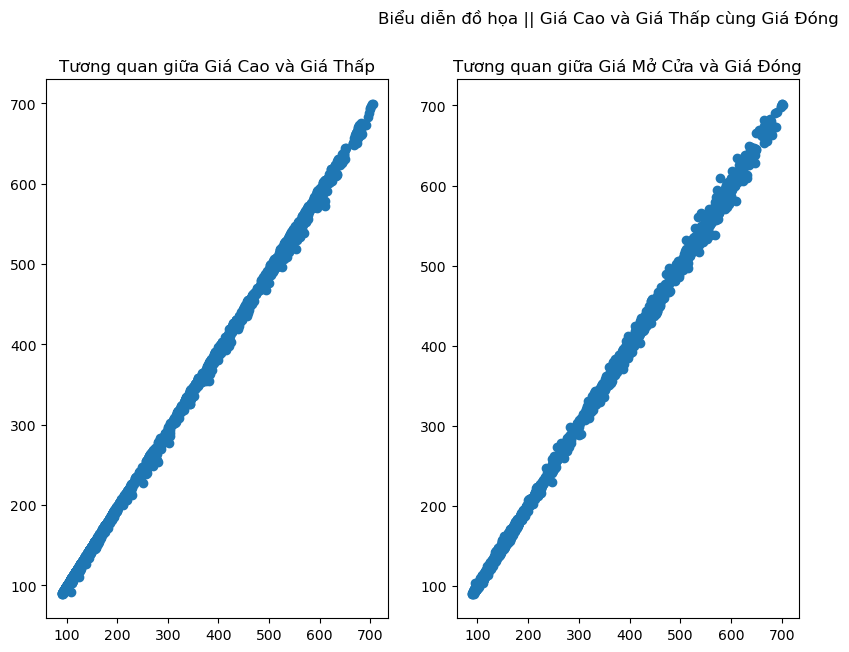

In [17]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.scatter(list(AAPL_11_23['high']), list(AAPL_11_23['low']))
plt.title("Tương quan giữa Giá Cao và Giá Thấp")
plt.subplot(132)
plt.scatter(list(AAPL_11_23['open']), AAPL_11_23['close'])
plt.title("Tương quan giữa Giá Mở Cửa và Giá Đóng")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

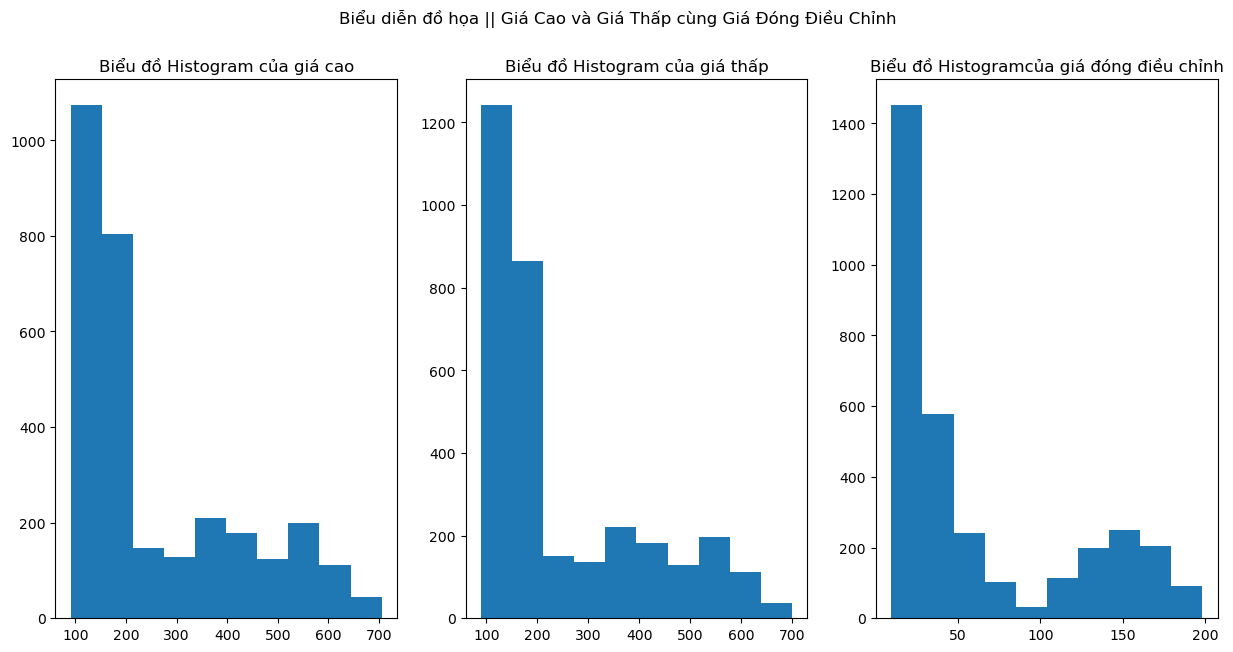

In [18]:
#Những biểu đồ này hiển thị các khoảng giá trị
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.hist(list(AAPL_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Histogram của giá cao")
plt.subplot(132)
plt.hist(list(AAPL_11_23['low']))
plt.title("Biểu đồ Histogram của giá thấp")
plt.subplot(133)
plt.hist(list(AAPL_11_23['adjusted_close']))
plt.title("Biểu đồ Histogramcủa giá đóng điều chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

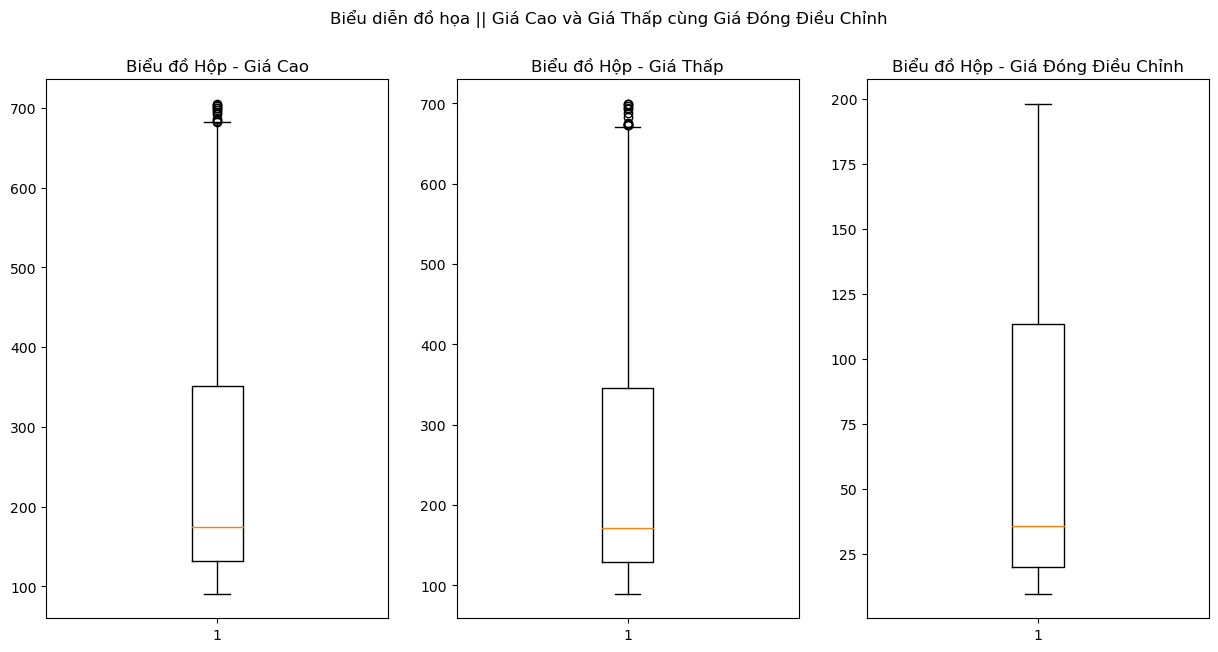

In [19]:
# Tạo một hình vẽ với kích thước 15x7 inch
plt.figure(figsize=(15, 7))

# Biểu đồ hộp cho giá cao (high)
plt.subplot(131)
plt.boxplot(list(AAPL_11_23['high']))
plt.title("Biểu đồ Hộp - Giá Cao")

# Biểu đồ hộp cho giá thấp (low)
plt.subplot(132)
plt.boxplot(list(AAPL_11_23['low']))
plt.title("Biểu đồ Hộp - Giá Thấp")

# Biểu đồ hộp cho giá đóng cửa điều chỉnh (adjusted_close)
plt.subplot(133)
plt.boxplot(list(AAPL_11_23['adjusted_close']))
plt.title("Biểu đồ Hộp - Giá Đóng Điều Chỉnh")

# Tiêu đề chính của toàn bộ biểu đồ
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")

# Hiển thị biểu đồ
plt.show()

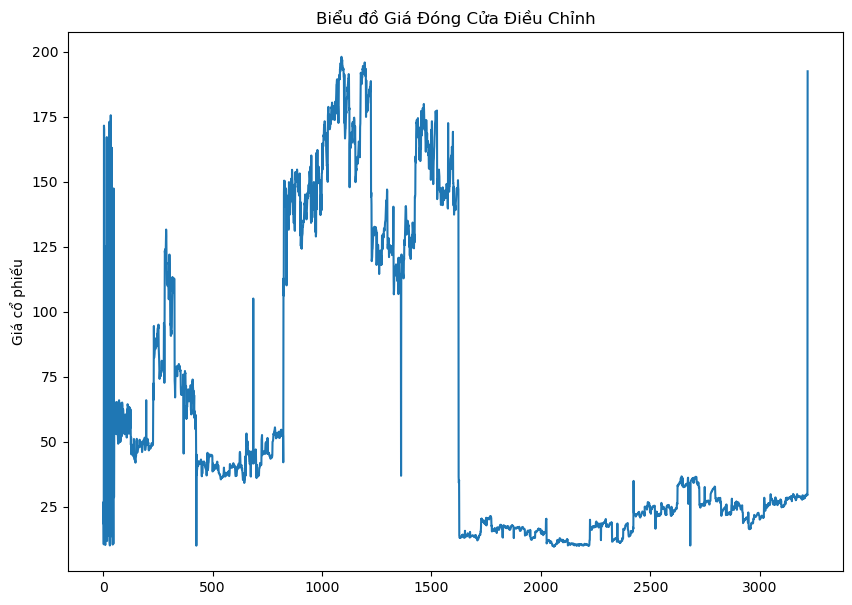

In [20]:
# Đồ thị này thể hiện các giá trị Giá Đóng Điều Chỉnh tăng và giảm.
plt.figure(figsize=(10, 7))
plt.plot(list(AAPL_11_23['adjusted_close'].value_counts().keys()))
plt.ylabel("Giá cổ phiếu")
plt.title("Biểu đồ Giá Đóng Cửa Điều Chỉnh")
plt.show()

<AxesSubplot:ylabel='high'>

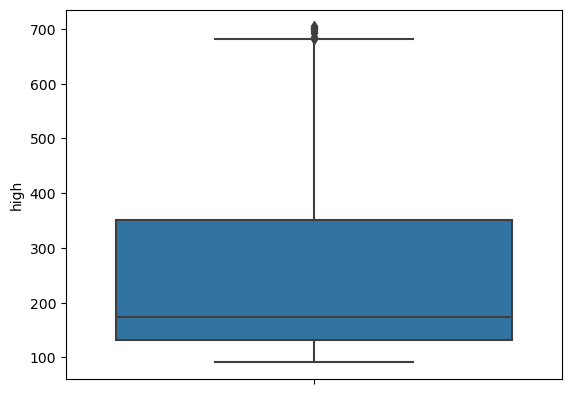

In [21]:
sns.boxplot(y="high", data=AAPL_11_23)

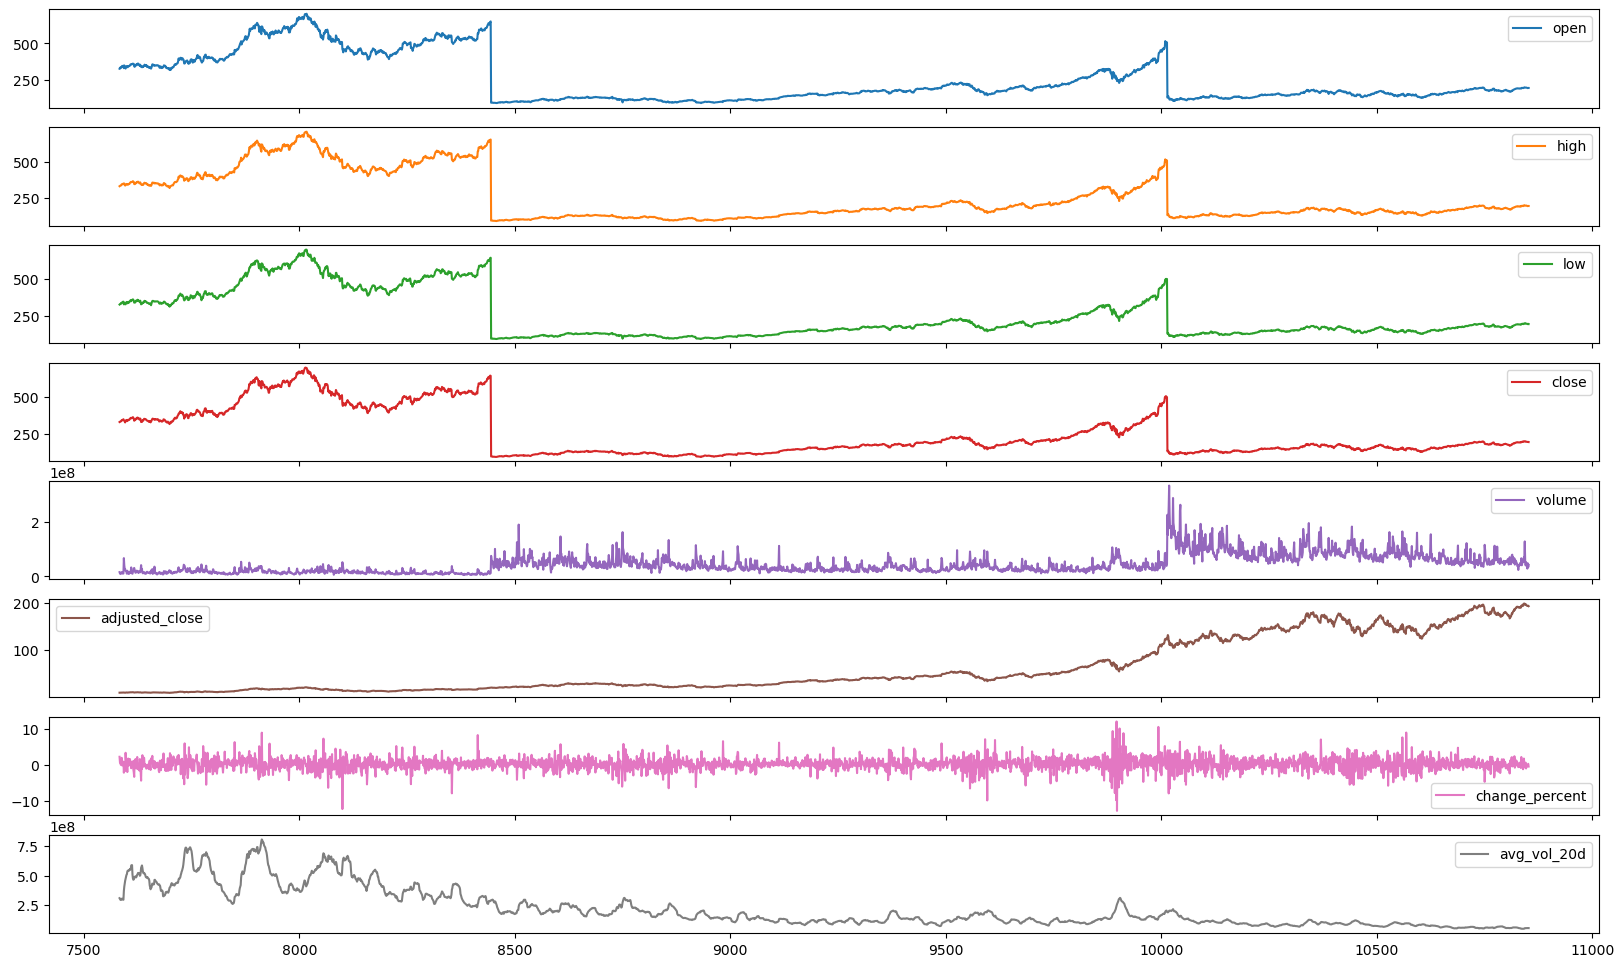

In [22]:
#Thể hiện sự tăng trưởng của từng cột
AAPL_11_23.plot(subplots=True, figsize=(20,12))
plt.show()

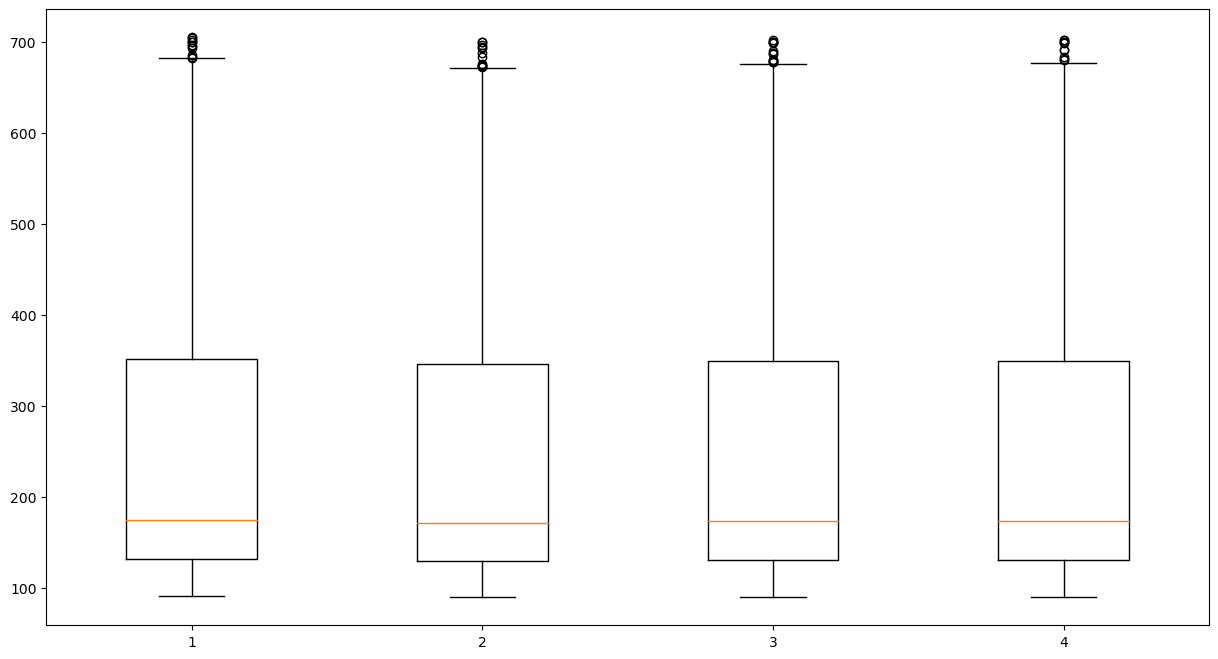

In [23]:
box_data = AAPL_11_23[['high', 'low', 'open', 'close']]

plt.figure(figsize=(15,8))
plt.boxplot(box_data)
plt.show()

In [24]:
a = AAPL_11_23['open'][10390:10409]
b = AAPL_11_23['close'][10390:10409]

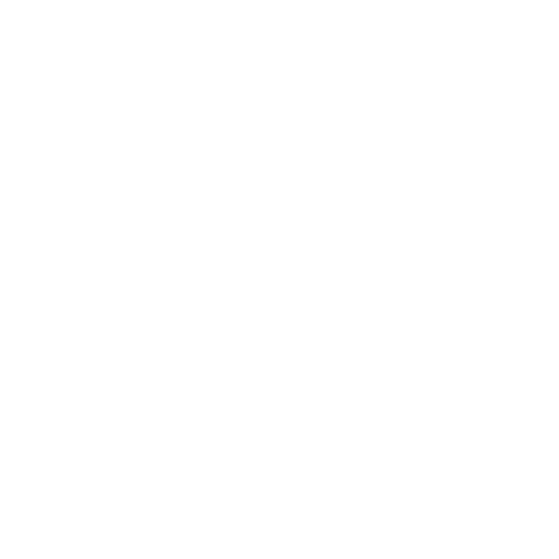

In [25]:
# Đây đang được hiển thị dưới dạng phần trăm.
plt.figure(figsize=(10, 7))
plt.pie((a.value_counts().keys()), (b.value_counts()), autopct='%0.2f%%')
plt.show()

**Statistical Methods**

In [26]:
# tóm tắt số liệu thống kê
AAPL_11_23.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000,3270.000000,3.270000e+03
mean,246.720530,249.132995,244.237684,246.760188,4.432481e+07,61.777744,0.107107,2.153815e+08
std,157.992197,159.367982,156.320831,157.864922,3.399849e+07,56.142416,1.783283,1.653357e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,9.546200,-12.860000,4.702649e+07
25%,130.285000,131.495000,129.142500,130.307500,2.013498e+07,19.718275,-0.760000,9.936056e+07
50%,172.790000,174.300000,171.500000,172.990000,3.365840e+07,35.535800,0.090000,1.412144e+08
75%,348.935300,351.771000,346.082600,349.445600,5.939270e+07,113.468050,1.040000,2.870864e+08
max,702.410800,705.070800,699.568800,702.100000,3.326072e+08,198.110000,11.980000,8.072396e+08


In [27]:
AAPL_11_23.rolling(7).mean().head(20)

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_20516\4094842334.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  AAPL_11_23.rolling(7).mean().head(20)


,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
7583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7589,334.2928,336.6984,331.9900,335.5432,1.283044e+07,10.158457,0.827143,299210520.0
7590,336.8084,338.7228,334.4416,337.6644,1.210316e+07,10.222671,0.632857,298230960.0
7591,338.6252,340.7428,336.6848,339.7200,1.204040e+07,10.284900,0.611429,297386180.0
7592,340.9596,342.7628,338.8188,341.7884,1.231244e+07,10.347514,0.610000,297418140.0


C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_20516\315515044.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  AAPL_11_23.rolling(window=30).mean()['close'].plot()


<AxesSubplot:>

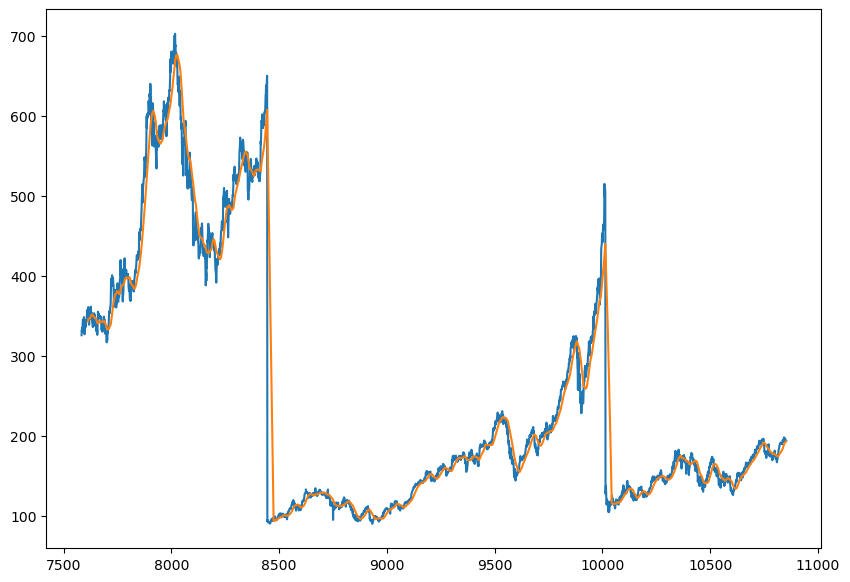

In [28]:
AAPL_11_23['open'].plot(figsize=(10, 7))
AAPL_11_23.rolling(window=30).mean()['close'].plot()

In [29]:
# Sử dụng Phương pháp Max chúng ta tìm Giá trị Tối đa
print("******************************* Hiển thị giá trị tối đa ********************************")
print(AAPL_11_23['open'].max(),"||", AAPL_11_23['close'].max(), "||", AAPL_11_23['high'].max(), "||", AAPL_11_23['low'].max(), 
      AAPL_11_23['adjusted_close'].max(), "||", AAPL_11_23['volume'].max())

******************************* Hiển thị giá trị tối đa ********************************
702.4108 || 702.1 || 705.0708 || 699.5688 198.11 || 332607200


In [30]:
# Sử dụng Phương pháp tối thiểu, chúng tôi tìm thấy Giá trị tối thiểu

print("******************************* Hiển thị giá trị tối thiểu ********************************")
print(AAPL_11_23['open'].min(),"||", AAPL_11_23['close'].min(), "||", AAPL_11_23['high'].min(), "||", AAPL_11_23['low'].min(), 
      AAPL_11_23['adjusted_close'].min(), "||", AAPL_11_23['volume'].min())

******************************* Hiển thị giá trị tối thiểu ********************************
90.0 || 90.28 || 90.7 || 89.47 9.5462 || 5704900


In [31]:
bl_col = AAPL_11_23.select_dtypes(include=('boolean')).columns
int_col = AAPL_11_23.select_dtypes(include=('int')).columns
str_col = AAPL_11_23.select_dtypes(include=('object')).columns

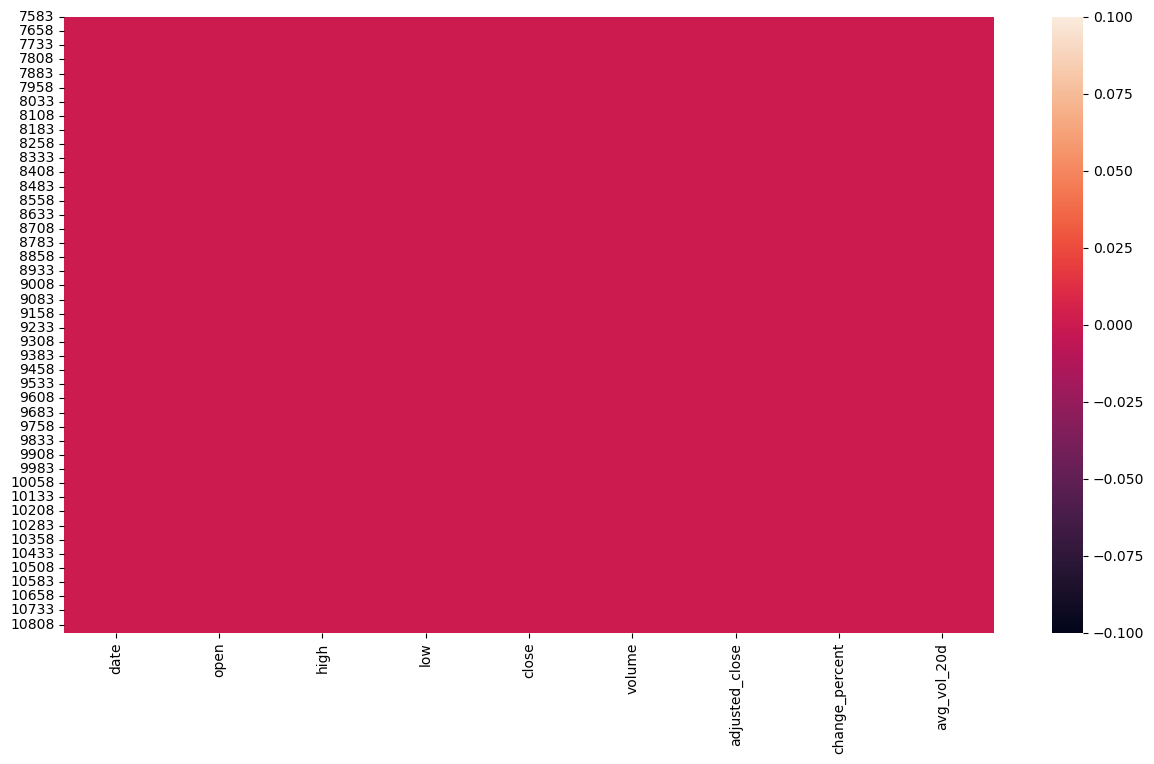

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(AAPL_11_23.isnull())
plt.show()

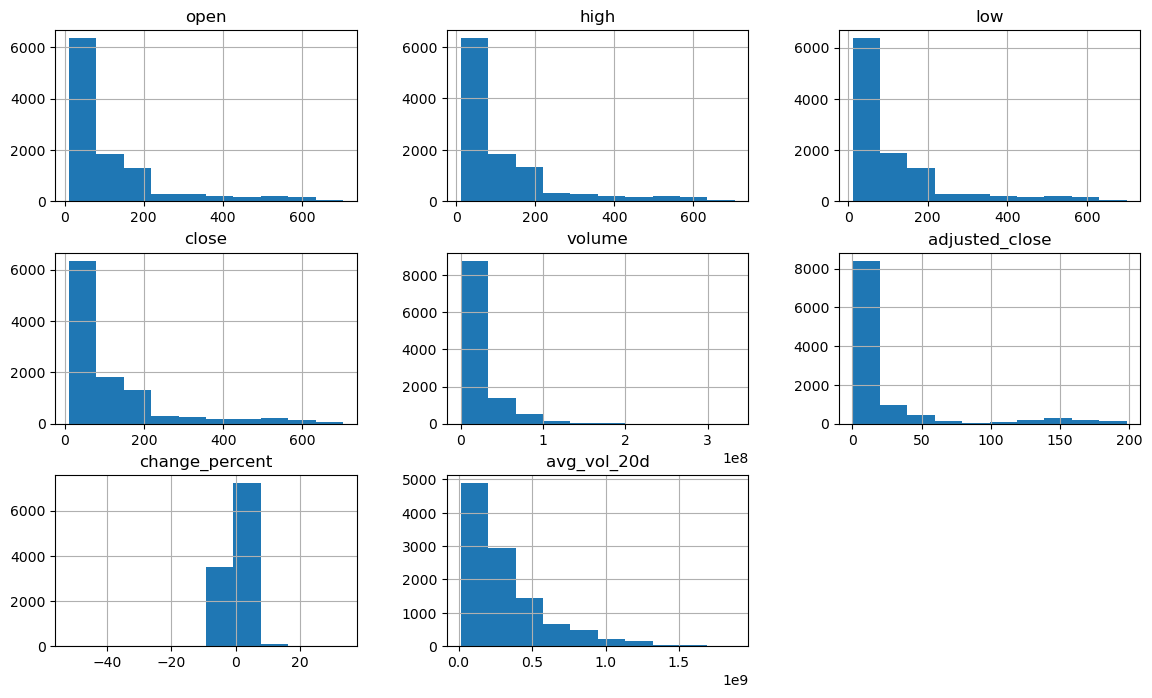

In [33]:
AAPL.hist(figsize=(14, 8))
plt.show()

In [34]:
AAPL_11_23.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

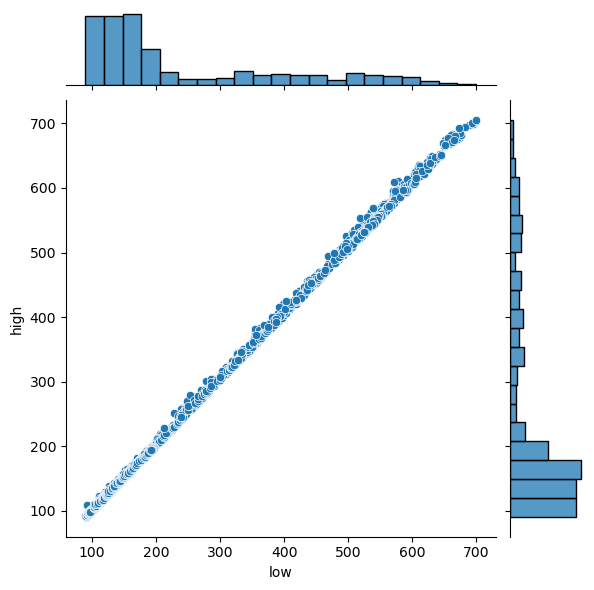

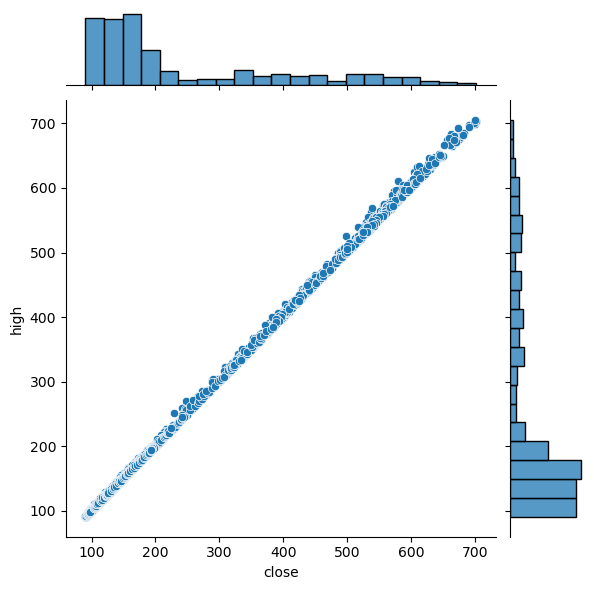

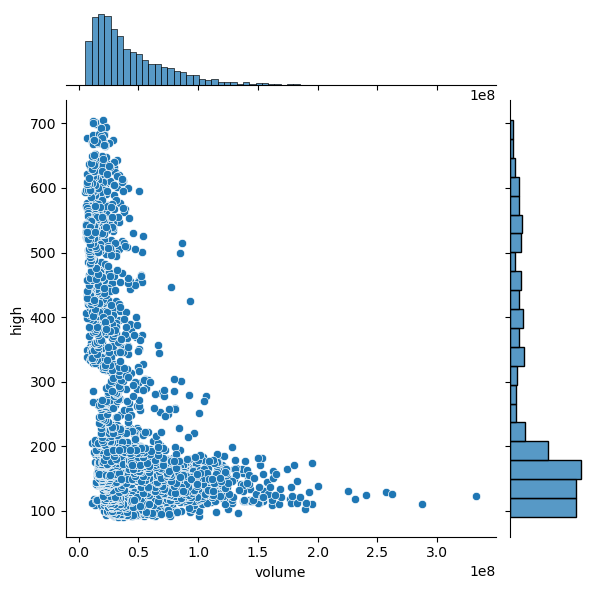

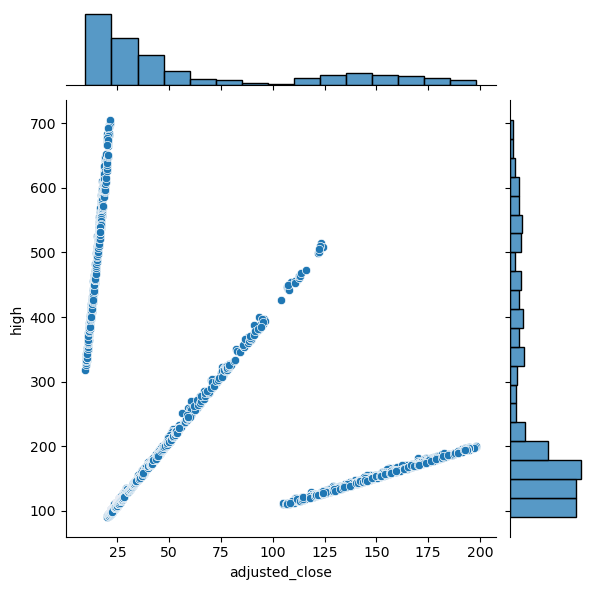

In [ ]:
sns.jointplot(data=AAPL_11_23, x='low', y='high')
sns.jointplot(data=AAPL_11_23, x='close', y='high')
sns.jointplot(data=AAPL_11_23, x='volume', y='high')
sns.jointplot(data=AAPL_11_23, x='adjusted_close', y='high')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


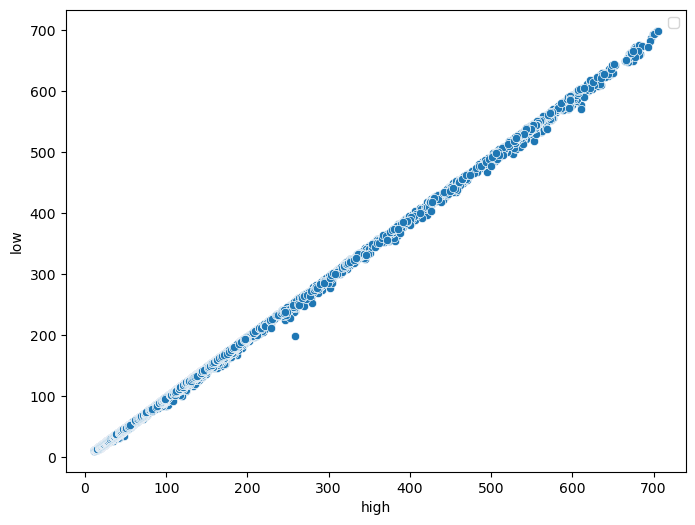

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='high', y='low', data=AAPL)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


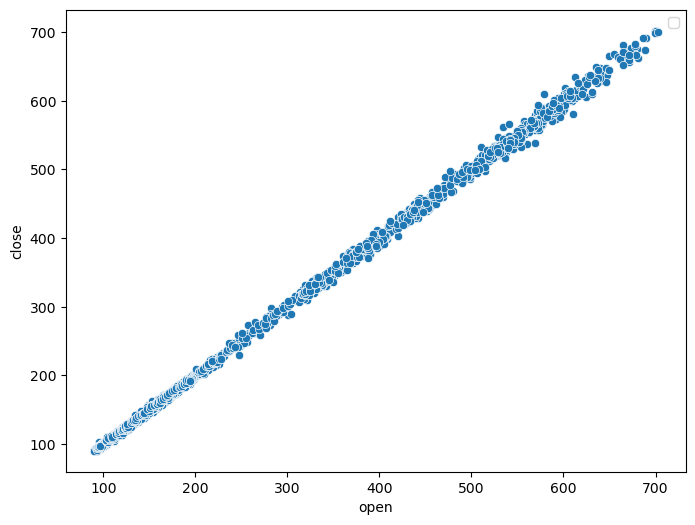

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='open', y='close', data=AAPL_11_23)
plt.legend()
plt.show()